In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

path = "E:/dataset/Hypertension/HeartBeat_DB/HeartBeat_Total.csv"

In [2]:
import pandas as pd
df = pd.read_csv(path)
df

,SubjectID,Start Time,Mean RR,Mean HR,RMSSD,STDRR,pNN50,Total Power,LF power,HF_power,...,SD12,S,PTM,PTM+,PTM-,PTM norm,sysnondipping,dianondipping,mapnondipping,heartnondipping
0,700001,180000,959.911894,62.505737,38.363942,37.300990,3.539823,712.864350,225.707876,427.455949,...,0.600134,3852.283686,2.179689,6.045109,2.254851,0.127309,1,1,1,0
1,700001,240000,942.791798,63.640774,21.877825,36.619592,2.531646,331.517310,146.089035,75.556526,...,0.316163,2377.627650,1.758350,4.917625,1.818983,0.232955,1,1,1,0
2,700001,270000,950.047619,63.154729,22.030668,39.459900,2.547771,444.173990,119.911083,69.853306,...,0.290781,2621.850272,1.685157,4.809830,1.755255,0.201176,1,1,1,0
3,700001,300000,952.468153,62.994232,21.031697,30.809742,1.277955,376.492822,151.623768,86.000468,...,0.365727,1898.547404,2.008877,5.056516,2.071965,0.330131,1,1,1,0
4,700001,330000,967.249191,62.031585,19.026639,28.536364,0.649351,284.927903,124.250303,76.531287,...,0.353733,1607.565030,1.925199,4.781978,2.003512,0.367659,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32801,700318,5610000,883.632219,67.901553,123.934791,93.763365,58.231707,3746.058184,1212.127081,1558.849472,...,0.887988,27170.339970,11.884710,30.018588,11.957846,0.143035,1,0,1,1
32802,700318,5640000,885.584615,67.751854,131.504530,99.905649,57.098765,5035.443700,1980.839341,2055.910501,...,0.874525,31061.960910,10.327723,29.271979,10.375908,0.107394,1,0,1,1
32803,700318,5700000,880.165563,68.168993,145.437820,110.774107,55.813953,6264.848196,2107.691418,3132.444388,...,0.870854,38152.954220,11.099164,32.601362,11.136285,0.087274,1,0,1,1
32804,700318,5730000,878.573668,68.292509,138.489152,115.874119,52.830189,7335.513028,2744.902044,2946.335573,...,0.745322,40420.957870,8.809076,28.321301,8.836953,0.069085,1,0,1,1


In [3]:
# 전체 결측치 제거
df = df.dropna().reset_index(drop=True)

# 확인
print(f"결측치 제거 후 shape: {df.shape}")
df

결측치 제거 후 shape: (32802, 25)


,SubjectID,Start Time,Mean RR,Mean HR,RMSSD,STDRR,pNN50,Total Power,LF power,HF_power,...,SD12,S,PTM,PTM+,PTM-,PTM norm,sysnondipping,dianondipping,mapnondipping,heartnondipping
0,700001,180000,959.911894,62.505737,38.363942,37.300990,3.539823,712.864350,225.707876,427.455949,...,0.600134,3852.283686,2.179689,6.045109,2.254851,0.127309,1,1,1,0
1,700001,240000,942.791798,63.640774,21.877825,36.619592,2.531646,331.517310,146.089035,75.556526,...,0.316163,2377.627650,1.758350,4.917625,1.818983,0.232955,1,1,1,0
2,700001,270000,950.047619,63.154729,22.030668,39.459900,2.547771,444.173990,119.911083,69.853306,...,0.290781,2621.850272,1.685157,4.809830,1.755255,0.201176,1,1,1,0
3,700001,300000,952.468153,62.994232,21.031697,30.809742,1.277955,376.492822,151.623768,86.000468,...,0.365727,1898.547404,2.008877,5.056516,2.071965,0.330131,1,1,1,0
4,700001,330000,967.249191,62.031585,19.026639,28.536364,0.649351,284.927903,124.250303,76.531287,...,0.353733,1607.565030,1.925199,4.781978,2.003512,0.367659,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32797,700318,5610000,883.632219,67.901553,123.934791,93.763365,58.231707,3746.058184,1212.127081,1558.849472,...,0.887988,27170.339970,11.884710,30.018588,11.957846,0.143035,1,0,1,1
32798,700318,5640000,885.584615,67.751854,131.504530,99.905649,57.098765,5035.443700,1980.839341,2055.910501,...,0.874525,31061.960910,10.327723,29.271979,10.375908,0.107394,1,0,1,1
32799,700318,5700000,880.165563,68.168993,145.437820,110.774107,55.813953,6264.848196,2107.691418,3132.444388,...,0.870854,38152.954220,11.099164,32.601362,11.136285,0.087274,1,0,1,1
32800,700318,5730000,878.573668,68.292509,138.489152,115.874119,52.830189,7335.513028,2744.902044,2946.335573,...,0.745322,40420.957870,8.809076,28.321301,8.836953,0.069085,1,0,1,1


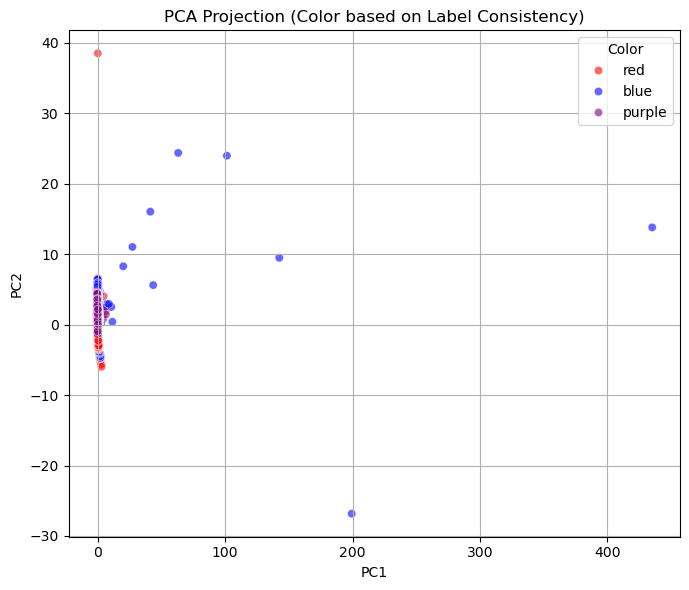

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Label 생성 및 불필요한 컬럼 제거
df['Label'] = df[['sysnondipping', 'dianondipping']].sum(axis=1).apply(lambda x: 0 if x == 0 else 1)
df = df.drop(columns=['mapnondipping', 'heartnondipping'])

# 2. 시각화용 색상 그룹 정의
def label_color(row):
    if row['sysnondipping'] == row['dianondipping']:
        return 'blue' if row['Label'] == 0 else 'red'
    else:
        return 'purple'  # 불일치 시

df['Color'] = df.apply(label_color, axis=1)

# 3. Feature/Label 분리
X = df.drop(columns=['SubjectID', 'Start Time', 'Label', 'Color', 'sysnondipping', 'dianondipping'])
y = df['Label']
colors = df['Color']

# 4. 스케일링 + PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 5. 시각화
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Color'] = colors

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Color',
    palette={'blue': 'blue', 'red': 'red', 'purple': 'purple'},
    alpha=0.6
)
plt.title("PCA Projection (Color based on Label Consistency)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
df['Label'].value_counts()

Label
1    18706
0    14096
Name: count, dtype: int64

C:\ProgramData\anaconda33\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


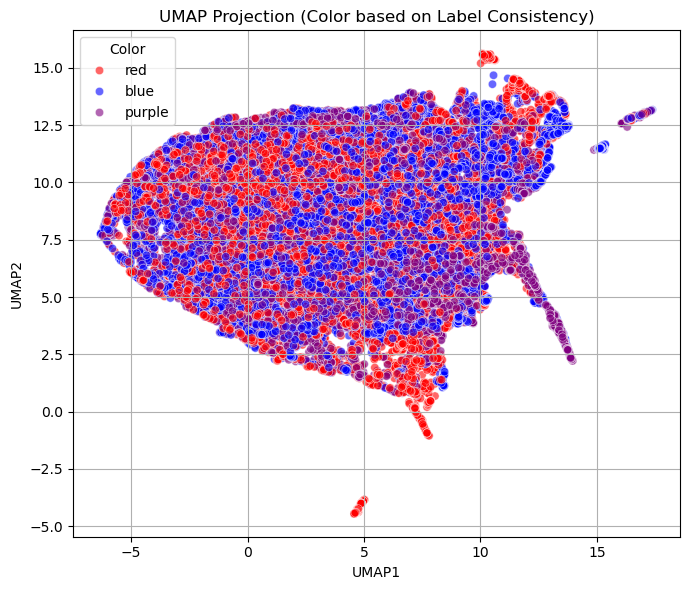

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap  # UMAP 모듈

def label_color(row):
    if row['sysnondipping'] == row['dianondipping']:
        return 'blue' if row['Label'] == 0 else 'red'
    else:
        return 'purple'  # 불일치 시

df['Color'] = df.apply(label_color, axis=1)

# 3. Feature 분리
X = df.drop(columns=['SubjectID', 'Start Time', 'Label', 'Color', 'sysnondipping', 'dianondipping'])
colors = df['Color']

# 4. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. UMAP 적용
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 6. 시각화
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Color'] = colors

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='Color',
    palette={'blue': 'blue', 'red': 'red', 'purple': 'purple'},
    alpha=0.6
)
plt.title("UMAP Projection (Color based on Label Consistency)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['SubjectID', 'Start Time', 'Mean RR', 'Mean HR', 'RMSSD', 'STDRR',
       'pNN50', 'Total Power', 'LF power', 'HF_power', 'LF/HF', 'LF norm',
       'HF norm', 'SD1', 'SD2', 'SD12', 'S', 'PTM', 'PTM+', 'PTM-', 'PTM norm',
       'sysnondipping', 'dianondipping', 'Label', 'Color'],
      dtype='object')

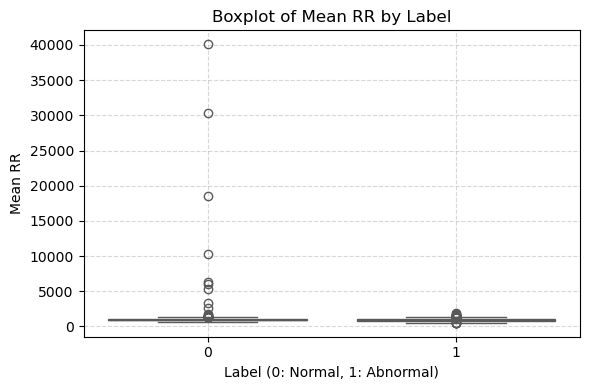

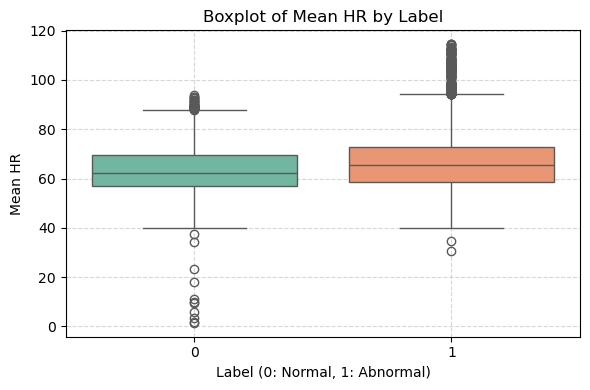

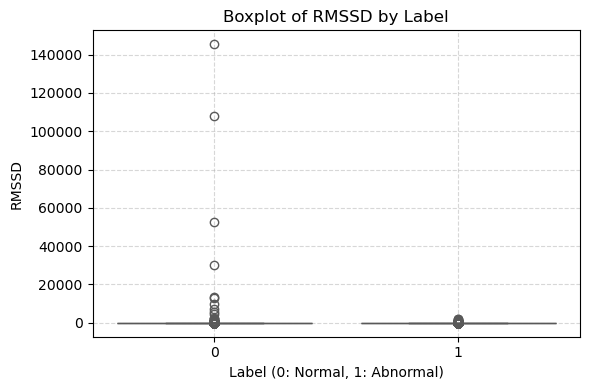

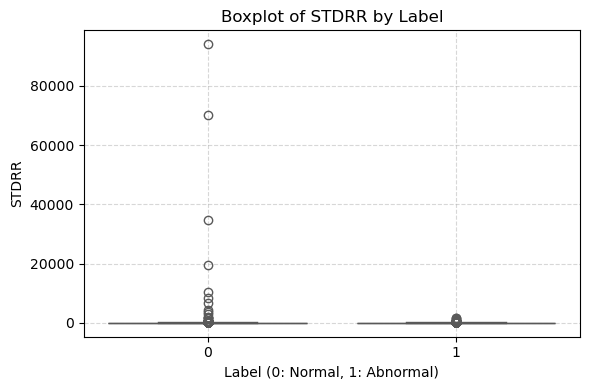

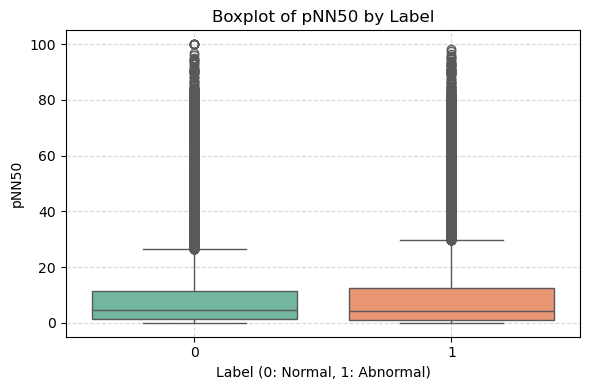

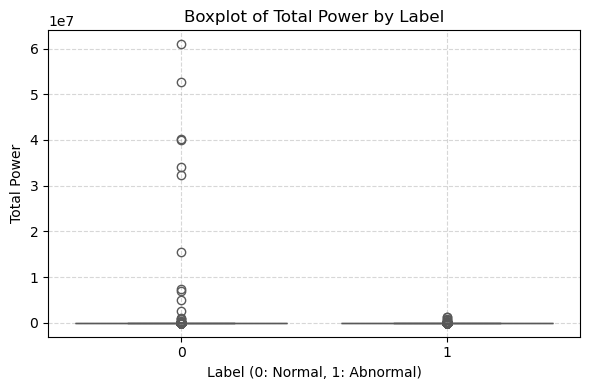

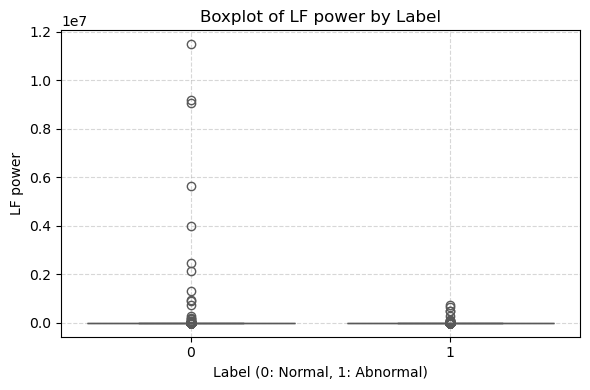

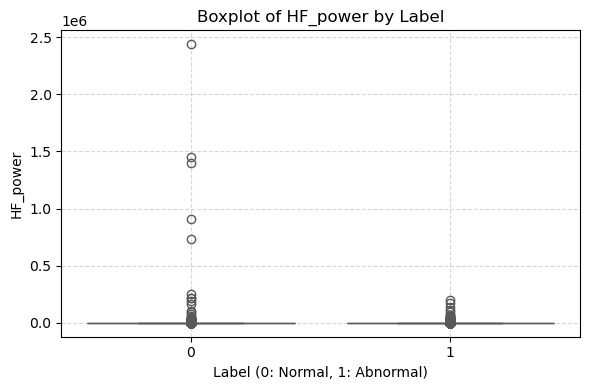

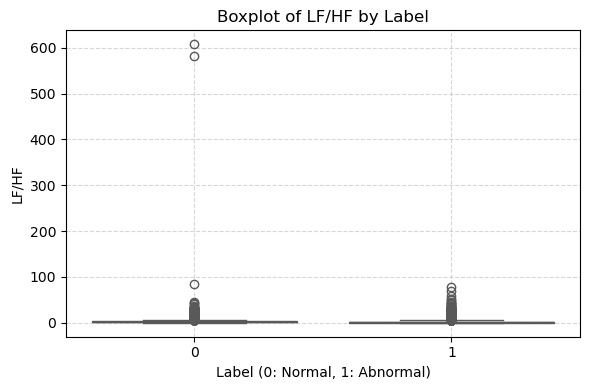

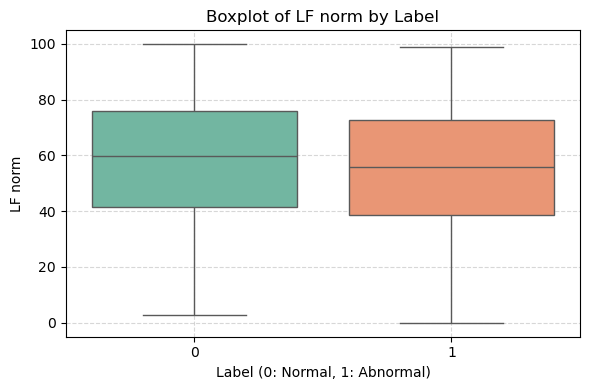

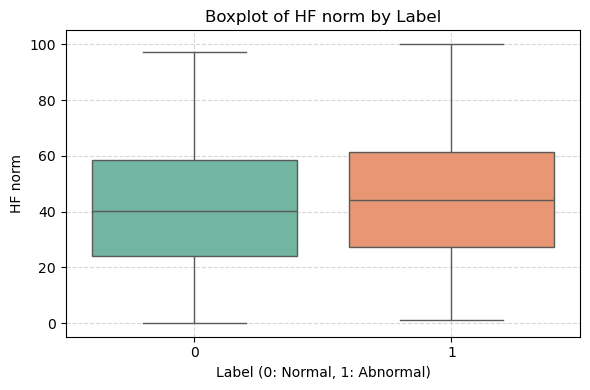

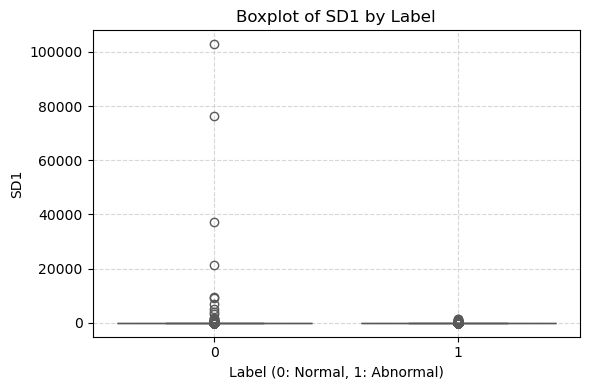

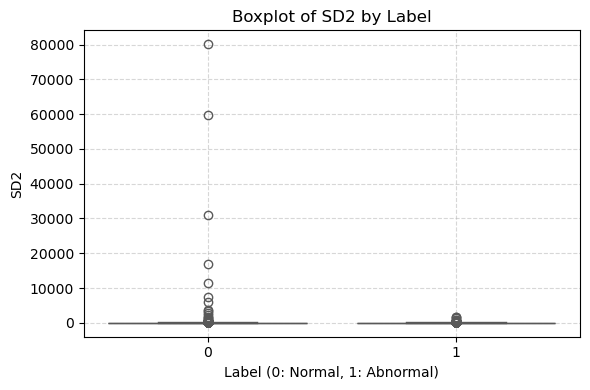

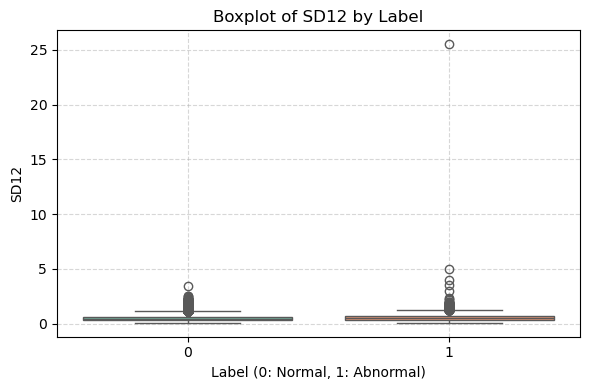

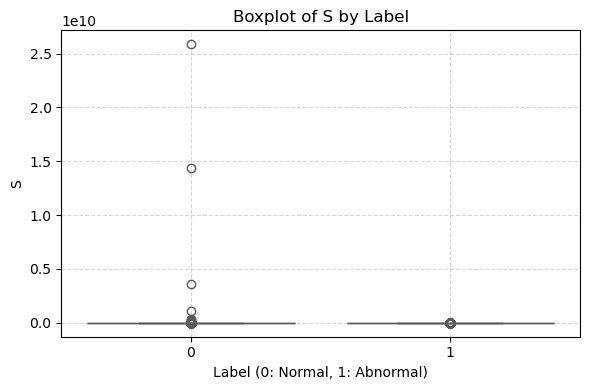

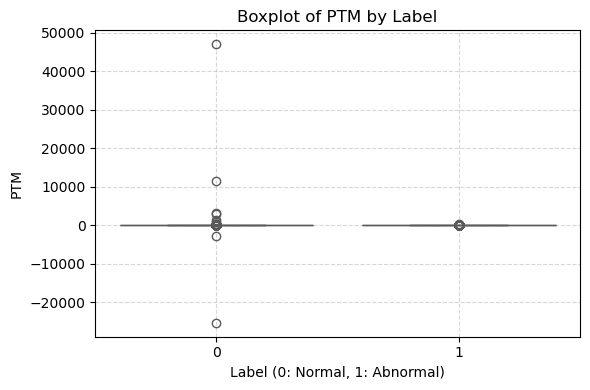

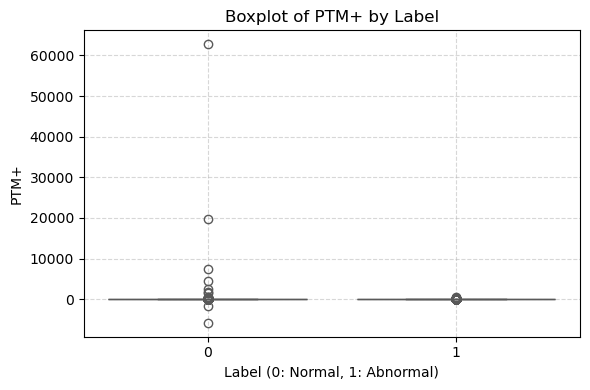

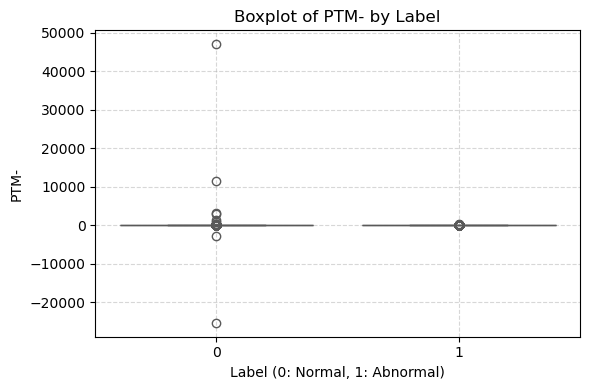

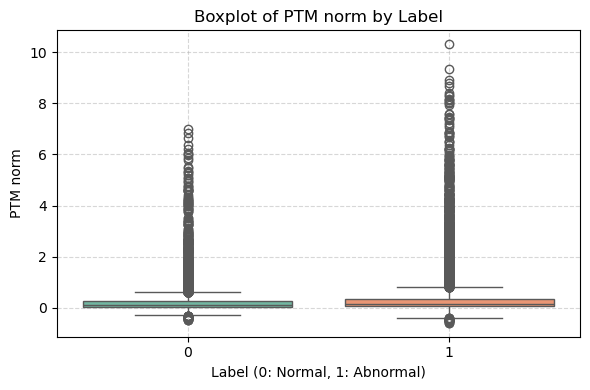

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Label 정수형 보장
df['Label'] = df['Label'].astype(int)

# 지정된 feature 리스트
features_to_plot = [
    'Mean RR', 'Mean HR', 'RMSSD', 'STDRR',
    'pNN50', 'Total Power', 'LF power', 'HF_power', 'LF/HF', 'LF norm',
    'HF norm', 'SD1', 'SD2', 'SD12', 'S', 'PTM', 'PTM+', 'PTM-', 'PTM norm'
]

# 존재하는 컬럼만 필터링
features_to_plot = [col for col in features_to_plot if col in df.columns]

# 시각화
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Label', y=col, hue='Label', palette='Set2', legend=False)
    plt.title(f'Boxplot of {col} by Label')
    plt.xlabel("Label (0: Normal, 1: Abnormal)")
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
